**What is EDA?**

- `Exploratory data analysis (EDA)` is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
- It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

**Why do EDA ?**

- Model building
- Analysis and Reporting
- Validate assumptions
- Handling missing values
- Feature engineering
- Detecting outliers

**Project Description:**
    
- The Titanic dataset contains information about passengers on the ***Titanic***, including whether they survived or not, their class, age, fare, and other attributes. 
- ***The goal is to explore the dataset, visualize key information, and draw insights about factors affecting survival rates.***

***Metadata:***
    
*Metadata means ***"data about data"***. Metadata is defined as the data providing information about one or more aspects of the data; it is used to summarize basic information about data that can make tracking and working with specific data easier.*

Link for the dataset `Titanic` : https://d17h27t6h515a5.cloudfront.net/topher/2016/September/57e9a84c_titanic-data/titanic-data.csv

***Dataset Description***: 
> - The sinking of the `RMS Titanic` is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
> - One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
> - Titanic Data - Contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

***Variables in the dataset***: 
> - `Survived`: 0 = No, 1 = Yes
> - `Pclass`: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
> - `Sex`: Gender of the passenger
> - `Age`: Age in years
> - `SibSp`: # of siblings/spouses aboard the Titanic
> - `Parch`: # of parents/children aboard the Titanic
> - `Ticket` :# Ticket number
> - `Fare`: Passenger fare
> - `Cabin`: Cabin number
> - `Embarked`: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Python libraries to be used in this project : `Scipy`, `NumPy`, `Pandas`, `Matplotlib` and `Seaborn`.

> Initial Questions about the data :
>> - Did the Port of Embarkation affect the chances of surviving?.
>> - How did the other factors influence this?
>> - Did Age effect the chances of surviving?

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting the working directory
import os
os.chdir('D:\\SCMA 632\\Py\\Project_1\\Data')

In [3]:
# Load the Titanic dataset
titanic = pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# des

In [15]:
# No of missing values by each columns/variable
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Conclusion about missing values**
 - Age has got 177 missing values
 - Embarked has got 2 missing values
 - cabin has lot of missing values so its bettet to drop that variable

# Univariate Analysis

- Univariate Analysis: This sort of evaluation makes a speciality of analyzing character variables inside the records set. It involves summarizing and visualizing a unmarried variable at a time to understand its distribution, relevant tendency, unfold, and different applicable records. Techniques like histograms, field plots, bar charts, and precis information are generally used in univariate analysis.

> Steps in Univariate Analysis of numercial columns
>> - Descriptive Statistics
>> - Visualisations
>> - Identify Outliers
>> - Skewness
>> - Conclusion

**Numerical Columns**

**1. Age Variable**

**Conclusion**
- Age is normally(almost) distributed
- 20% of the values are missing
- there are some outiliers

In [28]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [26]:
titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: title={'center': 'Age Histogram'}, ylabel='Frequency'>

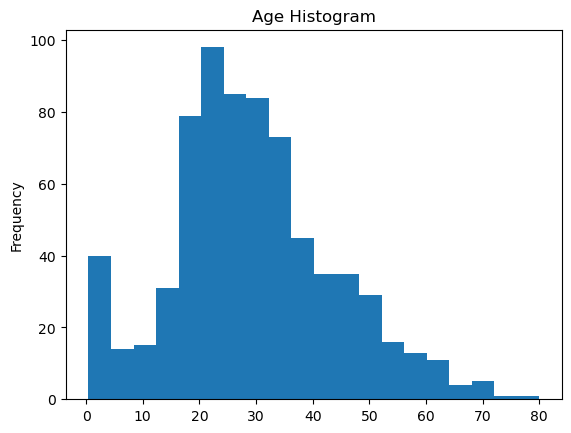

In [32]:
#Histogram - to know the distribution
titanic.Age.plot(kind='hist',bins=20, title="Age Histogram")

<Axes: title={'center': 'Age kde plot'}, ylabel='Density'>

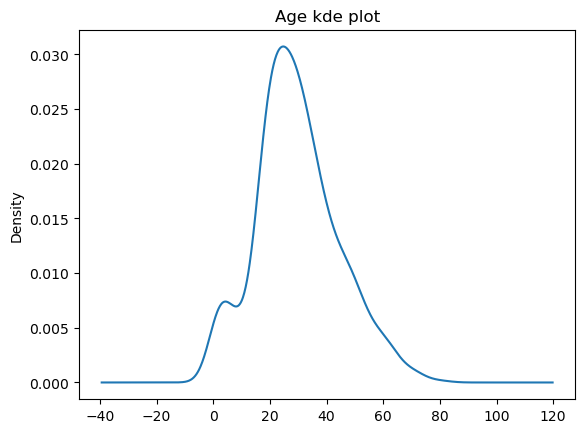

In [49]:
#kde plot to know the distribution
titanic.Age.plot(kind='kde', title="Age kde plot")

In [36]:
titanic.Age.skew()

0.38910778230082704

In [37]:
titanic.Age.isnull().sum()

177

In [38]:
len(titanic.Age)

891

In [39]:
177/891

0.19865319865319866

In [40]:
#checking percent missing values
titanic.Age.isnull().sum()/len(titanic.Age)

0.19865319865319866

<Axes: title={'center': 'Age Box Plot'}>

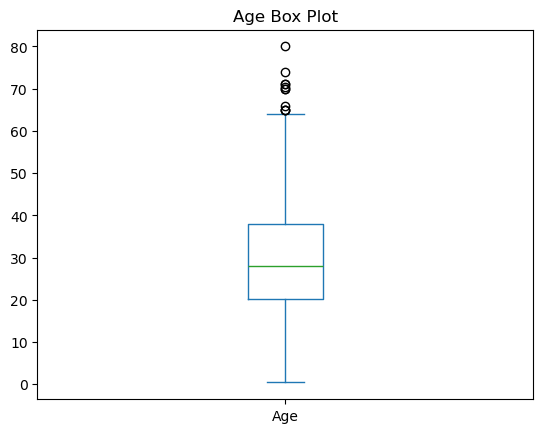

In [41]:
#outlier detection
titanic.Age.plot(kind='box', title= 'Age Box Plot')

In [48]:
titanic[titanic['Age'] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


**2. Fare Variable**

**Categorical Columns**

> Steps in Univariate Analysis of categorical columns
>> - Descriptive Statistics
>> - Visualisations
>> - Missing Values
>> - Conclusion

**Survived**

**Conclusion**
- 61.62 per cent of people dead in the titanic disaster
- 38.38 per cent of people survived

In [66]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [51]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Bar plot of Survived Variable'}, xlabel='Survived'>

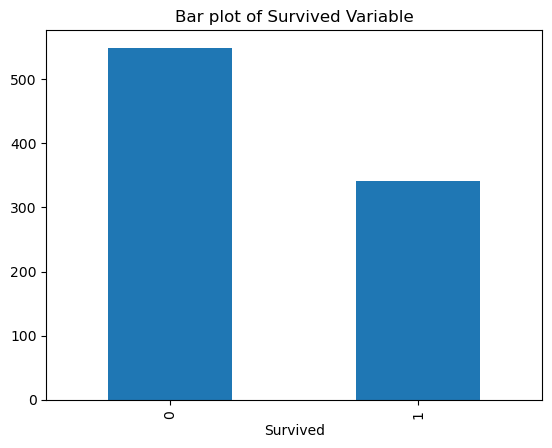

In [52]:
titanic['Survived'].value_counts().plot(kind='bar', title='Bar plot of Survived Variable')

<Axes: ylabel='count'>

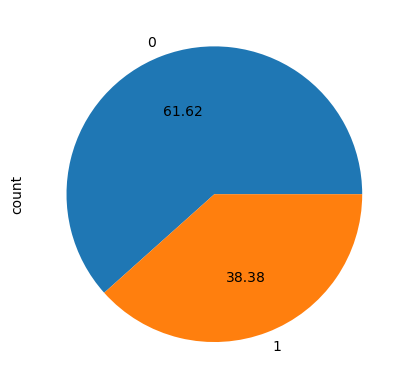

In [54]:
titanic['Survived'].value_counts().plot(kind='pie', autopct= '%.2f')

**Pclass variable**

**Conclusion**
- the people travelled in 1st class were more than people travelled in 2nd Class

In [56]:
titanic['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

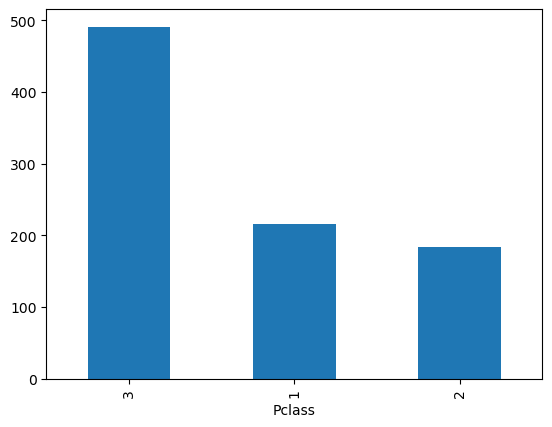

In [57]:
titanic['Pclass'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

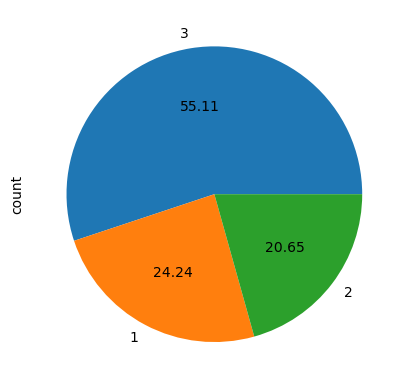

In [59]:
titanic['Pclass'].value_counts().plot(kind='pie', autopct='%.2f')

In [60]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex'>

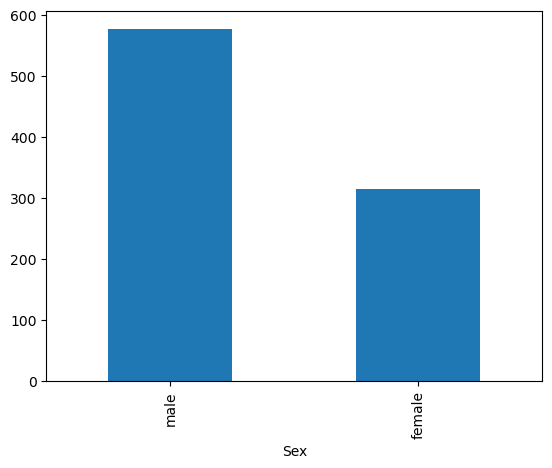

In [61]:
titanic['Sex'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

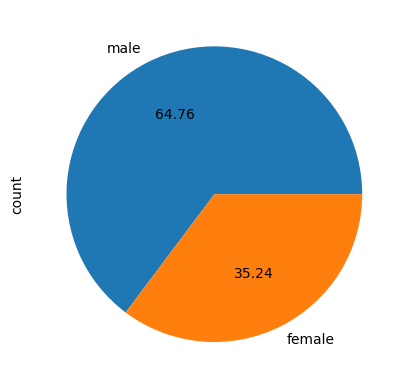

In [62]:
titanic['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

In [66]:
titanic['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: ylabel='count'>

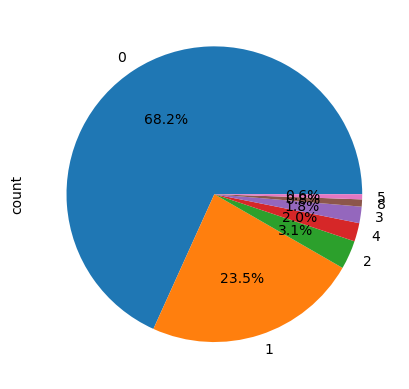

In [68]:
titanic['SibSp'].value_counts().plot(kind='pie', autopct='%0.1f%%')

**Date : 20-01-2024**

> Agenda
>> 1. Bivariate Analysis
>> 2. Feature Engineering
>> 3. User defined functions

**Bivariate Analysis**
> Bivariate analysis involves exploring the connection between  variables. It enables find associations, correlations, and dependencies between pairs of variables. Scatter plots, line plots, correlation matrices, and move-tabulation are generally used strategies in bivariate analysis.

Type of Relationship:
> 1. Numerical - Numerical 
>>- You can plot a Scatterplots, histplots, kde plots

> 2. Numerical - Categorical
>> - You can plot graphs like barplot, boxplot, kdeplot, scatterplots
> 3. Categorical - Categorical
>> - Cross-tabulations or contingency tables that show distributions of values in one categorical column, grouped by the values in the other categorical column
>> - You can plot plots like heatmap, stacked barplots, treemaps

In [17]:
titanic['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [18]:
titanic[titanic['Ticket'] == '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [19]:
titanic[titanic['Ticket'] == 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [58]:
69.55/11

6.322727272727272

In [ ]:
#bivaiate analysis 
# Survied and Pclass

In [114]:
# pd.crosstab(df['col1'], df['col2'])
pd.crosstab(titanic['Survived'], titanic['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


**Conclusion**
- People travelling in Pclass 1 are more likely to survive

<Axes: xlabel='Pclass', ylabel='Survived'>

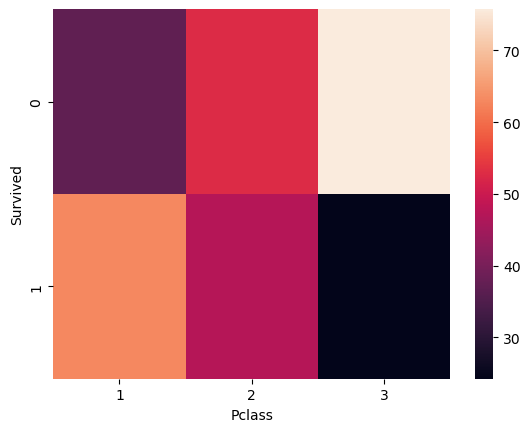

In [25]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Pclass'], normalize='columns')*100)

In [37]:
#cross across multiple categorical variables
pd.crosstab(index=[titanic['Survived'], titanic['Sex']], columns=titanic['Pclass'], normalize='columns')*100

Pclass                   1          2          3
Survived Sex                                    
0        female   1.388889   3.260870  14.663951
         male    35.648148  49.456522  61.099796
1        female  42.129630  38.043478  14.663951
         male    20.833333   9.239130   9.572301

<Axes: xlabel='Pclass', ylabel='Survived-Sex'>

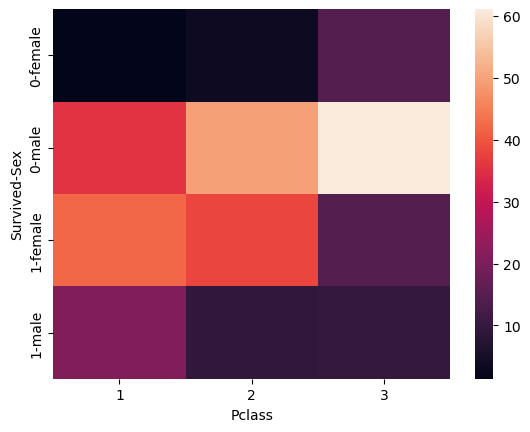

In [38]:
# heat map for more than two variables
sns.heatmap(pd.crosstab(index=[titanic['Survived'], titanic['Sex']], columns=titanic['Pclass'], normalize='columns')*100)

In [42]:
# pd.crosstab(df['col1'], df['col2'])
pd.crosstab(index= titanic['Survived'], columns=[titanic['Sex'],titanic['Pclass']])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47

**Conclusion**
- Females (74.20 %) are more likely to survive than male(18.89%)

<Axes: xlabel='Sex', ylabel='Survived'>

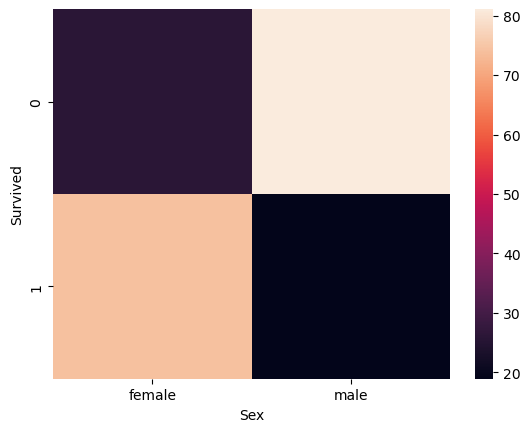

In [27]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Sex'], normalize='columns')*100)

In [70]:
pd.crosstab(titanic['Survived'],titanic['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [69]:
pd.crosstab(titanic['Survived'],titanic['Pclass'], normalize='columns')*100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

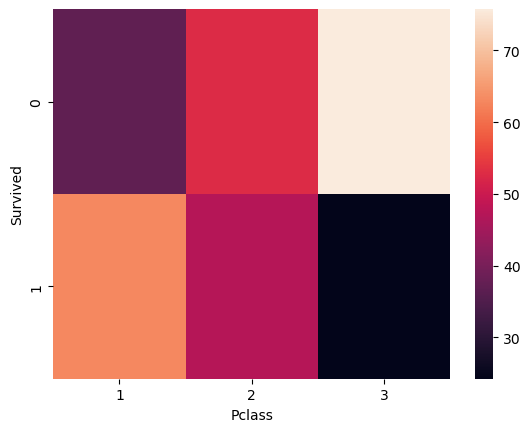

In [71]:
sns.heatmap(pd.crosstab(titanic['Survived'],titanic['Pclass'], normalize='columns')*100)

**Age vs Survived**

<Axes: ylabel='Density'>

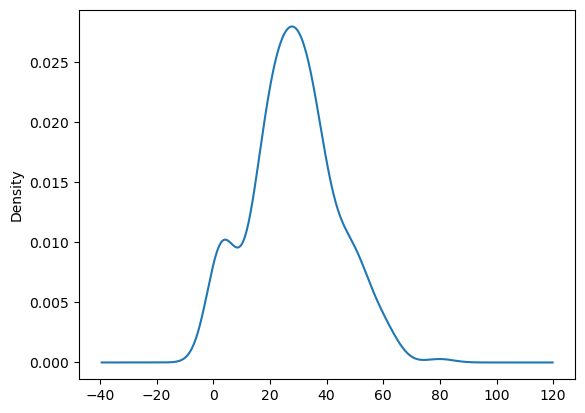

In [48]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', label='Dist of Age of people Survived')

<Axes: ylabel='Density'>

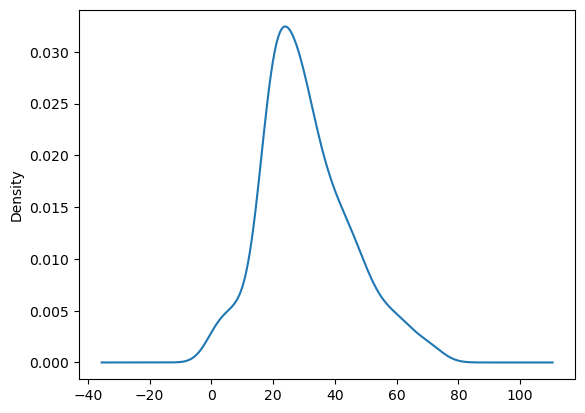

In [49]:
titanic[titanic['Survived'] == 0]['Age'].plot(kind='kde', label='Dist of Age of people Survived')

<Axes: ylabel='Density'>

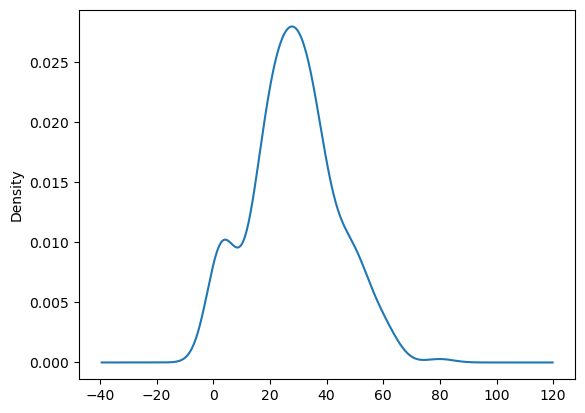

In [119]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')

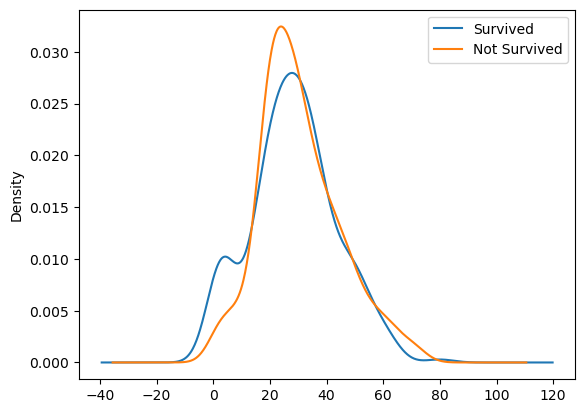

In [120]:
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', label='Survived')

titanic[titanic['Survived'] == 0]['Age'].plot(kind='kde', label='Not Survived')

plt.legend()
plt.show()

In [121]:
titanic[titanic['Pclass']==1]['Age'].mean()

38.233440860215055

**Feature engineering on fare col**

In [53]:
titanic['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [54]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [122]:
#new feature called family_size
titanic['family_size']=titanic['SibSp']+titanic['Parch']+1

individual fare = fare/family_size

In [59]:
#indiviual fare columns
titanic['ind_fare'] = titanic['Fare']/titanic['family_size']

In [61]:
titanic['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [63]:
titanic[titanic['Ticket'] == 'CA. 2343' ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,ind_fare
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,6.322727


**family type , if family size = 1 then alone, if family size =>2 less than 5 then small family, if family size is >5 then large family**

In [124]:
def function_name(a,b,c):
    return a+b+c

In [125]:
function_name(1,2,3)

6

In [130]:
# custom or user defined function condiftional function is defined
def transform_family_siz11e(num):
    if num == 1:
        return 'alone'
    elif num >1 and num <5:
        return 'small family'
    elif num < 10:
        return 'medium family'
    else:
        return 'xyz'

In [131]:
# custom or user defined function
def transform_family_size(num):
    if num == 1:
        return 'alone'
    elif num >1 and num <5:
        return 'small family'
    else:
        return 'large family'

In [132]:
titanic['family_type']= titanic['family_size'].apply(transform_family_size)

In [133]:
titanic['family_type']

0      small family
1      small family
2             alone
3      small family
4             alone
           ...     
886           alone
887           alone
888    small family
889           alone
890           alone
Name: family_type, Length: 891, dtype: object

In [135]:
titanic[titanic['family_size']==4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C,4,small family
58,59,1,2,"West, Miss. Constance Mirium",female,5.00,1,2,C.A. 34651,27.7500,NaN,S,4,small family
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.00,3,0,3101278,15.8500,NaN,S,4,small family
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.00,1,2,C.A. 2315,20.5750,NaN,S,4,small family
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S,4,small family
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,4,small family
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,4,small family
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S,4,small family
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.00,1,2,113760,120.0000,B96 B98,S,4,small family
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C,4,small family


In [77]:
#user defined functions
def sum_of_numbers(x,y,z):
    return x+y+z

In [76]:
sum_of_numbers(1,2,4)

7

In [82]:
# '(a+b)^2' = a^2+b^2+2ab
def sqrofnumber(x,y):
    return (x**2)+(y**2)+(2*x*y)

In [92]:
import math

def squarerootofanumbernew(x):
    return math.sqrt(x)

In [93]:
squarerootofanumbernew(9)

3.0

In [89]:
def sqaurerootofanumber(x):
    return x**(1/2)

In [90]:
sqaurerootofanumber(9)

3.0

In [94]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,ind_fare,family_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,3.62500,small family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,35.64165,small family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,7.92500,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,26.55000,small family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,8.05000,alone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,13.00000,alone
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,30.00000,alone
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,5.86250,small family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,30.00000,alone


In [95]:
pd.crosstab(titanic['Survived'],titanic['family_type'],normalize='columns')*100

family_type,alone,large family,small family
Survived,,,
0,69.646182,83.870968,42.123288
1,30.353818,16.129032,57.876712


In [96]:
pd.crosstab(titanic['Survived'],titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


In [ ]:
# one reason higher class-correct
# people boarded from c port are females (most of them) - wrong 

In [97]:
pd.crosstab(titanic['Sex'],titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [98]:
pd.crosstab(titanic['Pclass'],titanic['Embarked'],normalize='columns')*100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


In [99]:
# one reason higher class-correct
# people boarded from c port are females (most of them) - wrong 

In [136]:
# custom or user defined function
def age_trans(num):
    if  0< num <=15:
        return 'kid'
    elif num <=60:
        return 'adults'
    else:
        return 'seniors'

In [137]:
titanic['Age_group'] = titanic['Age'].apply(age_trans)

In [138]:
titanic[titanic['Age'] == 16]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,family_type,Age_group
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,8,large family,adults
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,5,large family,adults
138,139,0,3,"Osen, Mr. Olaf Elon",male,16.0,0,0,7534,9.2167,NaN,S,1,alone,adults
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q,1,alone,adults
208,209,1,3,"Carr, Miss. Helen ""Ellen""",female,16.0,0,0,367231,7.7500,NaN,Q,1,alone,adults
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S,1,alone,adults
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,6,large family,adults
282,283,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,345778,9.5000,NaN,S,1,alone,adults
329,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C,2,small family,adults
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.0,2,0,345764,18.0000,NaN,S,3,small family,adults


In [139]:
pd.crosstab(titanic['Survived'],titanic['Age_group'],normalize='columns')*100

Age_group,adults,kid,seniors
Survived,,,
0,61.247947,40.963855,71.356784
1,38.752053,59.036145,28.643216


In [141]:
titanic['family_type'].unique()

array(['small family', 'alone', 'large family'], dtype=object)

In [140]:
titanic['Survived'].unique()

array([0, 1], dtype=int64)

In [142]:
Class1 = [20,30,40]
Class2 = [50,60,70]

In [ ]:
Sales of business company = 0.5 * no. of outlets - 0.8 price_inputs + 4 * adv costs + 0.2 * price_competitors

Our dependent vairable is Survived, 0 and 1 , binary variable, logistic regression 

**Modeling Data: To model the dataset, we apply logistic regression.**

Logistic regression is a supervised machine learning algorithm mainly used for binary classification where we use a logistic function, also known as a sigmoid function that takes input as independent variables and produces a probability value between 0 and 1. For example, we have two classes Class 0 and Class 1 if the value of the logistic function for an input is greater than 0.5 (threshold value) then it belongs to Class 1 it belongs to Class 0. It’s referred to as regression because it is the extension of linear regression but is mainly used for classification problems. The difference between linear regression and logistic regression is that linear regression output is the continuous value that can be anything while logistic regression predicts the probability that an instance belongs to a given class or not.

0 to 1

Survived 0 or 1, categorical beacuse , 0 = "Not Survived" and 1 = "Survived"

In [ ]:
Survived, Age, family_type, Pclass

**Understanding Logistic Regression**
- It is used for predicting the categorical dependent variable using a given set of independent variables.
- Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value.
- It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
- Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
- In Logistic regression, instead of fitting a regression line, we fit an “S” shaped logistic function, which predicts two maximum values (0 or 1).
- The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
- Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
- Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


#functions
print(), head(),describe()

In [48]:
#laod libraries
import pandas as pd #panel data
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression # class
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns #plotting graphs
import matplotlib.pyplot #plotting graphs
%matplotlib inline
import math

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Cleaning the Dataset**

In [8]:
df = titanic.drop(columns=['Name', 'PassengerId','Cabin','Ticket','Embarked'], axis=1)

In [9]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


**we need to drop sex, SibSp, we will create features and then drop them**

**Note**: ***To apply logistic regression all the columns should have categorial or numerical values.***

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [11]:
df.shape

(891, 7)

In [12]:
#dropping the missing values
df = df.dropna()

In [13]:
df.shape

(714, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 44.6+ KB


In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

get_dummies - creat dummy variables

Sex = 'male' or 'female'

Sex = 0 or 1 

In [16]:
pd.get_dummies(df['Sex']).head(5)

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


creating dummy vaiables - if that varible has n categories then dummy variable we create n-1

In [17]:
#function to transform the Sex column
def gender_transform(val):
    if val == 'male':
        return 1
    else:
        return 0

In [18]:
binary_sex = df['Sex'].apply(gender_transform)

In [19]:
binary_sex

0      1
1      0
2      0
3      0
4      1
      ..
885    0
886    1
887    0
889    1
890    1
Name: Sex, Length: 714, dtype: int64

In [20]:
pd.get_dummies(df['Pclass']).head(5)

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


n = 3 , dummy variable should be n-1 = 2 # to avoid multicolinearity problem 

n number of categories in a columns then we need to create n-1 dummies
by doing this we are avoiding a problem called dummy variable trap

In [21]:
binary_Pclass = pd.get_dummies(df['Pclass'],drop_first = True)

In [23]:
binary_Pclass

,2,3
0,False,True
1,False,False
2,False,True
3,False,False
4,False,True
...,...,...
885,False,True
886,True,False
887,False,False
889,False,False


In [24]:
binary_Pclass.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2       714 non-null    bool 
 1   3       714 non-null    bool 
dtypes: bool(2)
memory usage: 7.0 KB


In [25]:
#function to transform the pclass 2 and 3
def class_transform(val):
    return val.eq(True).astype(int)

In [26]:
binary_Pclass = binary_Pclass.apply(class_transform)

In [27]:
binary_Pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [28]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [31]:
modified_data_set = pd.concat([df, binary_sex, binary_Pclass], axis = 1)

In [32]:
modified_data_set.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex,2,3
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [33]:
modified_data_set

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex,2,3
0,0,3,male,22.0,1,0,7.2500,1,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,0
2,1,3,female,26.0,0,0,7.9250,0,0,1
3,1,1,female,35.0,1,0,53.1000,0,0,0
4,0,3,male,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,0,0,1
886,0,2,male,27.0,0,0,13.0000,1,1,0
887,1,1,female,19.0,0,0,30.0000,0,0,0
889,1,1,male,26.0,0,0,30.0000,1,0,0


In [34]:
final_data_set = modified_data_set.drop(columns = ['Sex', 'Pclass'])

In [35]:
final_data_set.head()

,Survived,Age,SibSp,Parch,Fare,2,3
0,0,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,0,0
2,1,26.0,0,0,7.9250,0,1
3,1,35.0,1,0,53.1000,0,0
4,0,35.0,0,0,8.0500,0,1


In [36]:
final_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
 5   2         714 non-null    int32  
 6   3         714 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 39.0 KB


In [37]:
final_data_set.rename(columns = {2:'pcalss2',3:'pclass3'}, inplace = True)

In [38]:
final_data_set.head()

,Survived,Age,SibSp,Parch,Fare,pcalss2,pclass3
0,0,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,0,0
2,1,26.0,0,0,7.9250,0,1
3,1,35.0,1,0,53.1000,0,0
4,0,35.0,0,0,8.0500,0,1


In [39]:
final_data_set = final_data_set.dropna()

## **Modeling the DataSet**

- *Y is the target variable (the variable to be predicted)* in our case its 'Survived' 

- *X is the DataFrame containing all the features (independent variables) except the target variable.* in ourcase Age,SibSp,Parch,Fare, Pclass2, and Pclass3

*Multicollinearity is a statistical phenomenon in regression analysis where two or more independent variables in a multiple regression model are highly correlated. This high correlation can cause issues in the estimation of the regression coefficients.*

correlation value more than 95% or 0.95

*The dummy variable trap refers to the multicollinearity that arises when one or more independent variables in a regression model can be predicted from the others. It often occurs when using dummy variables to represent categorical variables.*

In [40]:
Y= final_data_set['Survived']
X= final_data_set.drop(['Survived'], axis = 1 )

In [41]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
X.head()

,Age,SibSp,Parch,Fare,pcalss2,pclass3
0,22.0,1,0,7.2500,0,1
1,38.0,1,0,71.2833,0,0
2,26.0,0,0,7.9250,0,1
3,35.0,1,0,53.1000,0,0
4,35.0,0,0,8.0500,0,1


In [ ]:
#split dataset into train and test

#well check wheather the model is fitting corretly or not, wheather is overfitting or underfitting

#for evaluation of the model 

training 0.8 or 80% of data 
test we use 0.2 or 20% of the data

In [197]:
#test sample
714*.2

142.8

In [43]:
Y.shape

(714,)

In [44]:
#train sample
714*.8

571.2

In [45]:
714-571

143

In [54]:
test_set_size = 0.2
seed = 1

In [55]:
#test train split
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y, test_size = test_set_size , random_state = seed)

In [59]:
Y_train.shape

(571,)

In [60]:
Y_test.shape

(143,)

In [57]:
X_train.shape # seed = 1 

(571, 6)

In [58]:
X_test.shape

(143, 6)

In [50]:
X_train.head() # seed = 1 

,Age,SibSp,Parch,Fare,pcalss2,pclass3
830,15.0,1,0,14.4542,0,1
565,24.0,2,0,24.1500,0,1
148,36.5,0,2,26.0000,1,0
105,28.0,0,0,7.8958,0,1
289,22.0,0,0,7.7500,0,1


In [56]:
X_train.head()

,Age,SibSp,Parch,Fare,pcalss2,pclass3
830,15.0,1,0,14.4542,0,1
565,24.0,2,0,24.1500,0,1
148,36.5,0,2,26.0000,1,0
105,28.0,0,0,7.8958,0,1
289,22.0,0,0,7.7500,0,1


In [213]:
len(Y_train)

571

In [205]:
X_train.head()

,Age,SibSp,Parch,Fare,pcalss2,pclass3
830,15.0,1,0,14.4542,0,1
565,24.0,2,0,24.1500,0,1
148,36.5,0,2,26.0000,1,0
105,28.0,0,0,7.8958,0,1
289,22.0,0,0,7.7500,0,1


In [211]:
X_train.head()

,Age,SibSp,Parch,Fare,pcalss2,pclass3
830,15.0,1,0,14.4542,0,1
565,24.0,2,0,24.1500,0,1
148,36.5,0,2,26.0000,1,0
105,28.0,0,0,7.8958,0,1
289,22.0,0,0,7.7500,0,1


In [61]:
#laod libraries
import pandas as pd
import sklearn
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot
%matplotlib inline
import math

In [62]:
#initiating the model
model = LogisticRegression()

In [63]:
type(model)

sklearn.linear_model._logistic.LogisticRegression

In [64]:
type(titanic)

pandas.core.frame.DataFrame

In [65]:
#fitting the model
model.fit(X_train, Y_train)

LogisticRegression()

In [67]:
predictions = model.predict(X_test)

In [74]:
actual = np.array(Y_test)

In [75]:
actual

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [68]:
predictions

array([1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [229]:
len(predictions)

143

In [69]:
report = classification_report(Y_test, predictions)

In [70]:
print(report)

              precision    recall  f1-score   support

           0       0.76      0.86      0.80        86
           1       0.73      0.58      0.65        57

    accuracy                           0.75       143
   macro avg       0.74      0.72      0.73       143
weighted avg       0.75      0.75      0.74       143



In [76]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

In [77]:
confusion_matrix

array([[74, 12],
       [24, 33]], dtype=int64)

accuracy = TP+TN/ (TP+TN+FP+FN)

In [78]:
accuracy = (74+33)/(74+12+24+33)

In [79]:
accuracy

0.7482517482517482

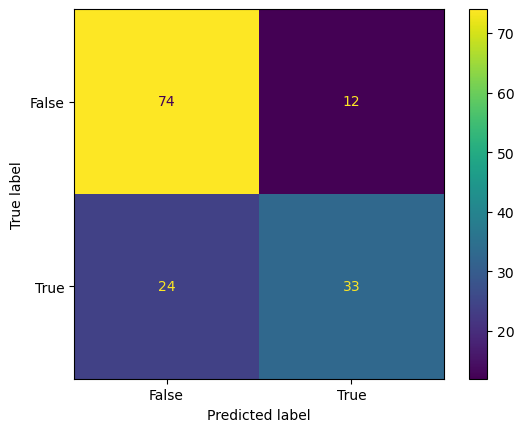

In [81]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [104]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.analyticsvidhya.com/wp-content/uploads/2024/01/image-66.png")

In [105]:
Image(url='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Equation_Accuracy.png')

In [238]:
accuracy = (560+330)/(560+60+50+330)

In [239]:
accuracy

0.89

In [106]:
Image(url='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Confusion-matrix_Precision.png')

precision = (Actual = Survived, Predited also survived)/Actual = Survived, Predited also survived+ Actual  Did not survived, predicetd as survived

In [95]:
Image(url='https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/Confusion-matrix_Recall.png')